# check softmax correctness

In [1]:

from neuralnet import *
import scipy.special

In [2]:
# check softmax
x = np.random.normal(1,1,size = (5,10))
y_ = softmax(x)

In [3]:
np.sum(y_, axis = 1)

array([1., 1., 1., 1., 1.])

In [4]:
y_scipy = scipy.special.softmax(x, axis = 1)

In [5]:
np.sum(y_scipy, axis = 1)

array([1., 1., 1., 1., 1.])

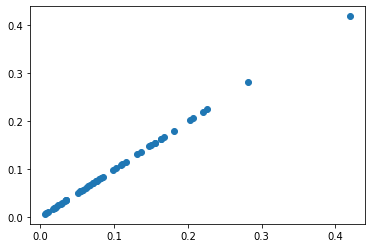

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_scipy.reshape(50), y_.reshape(50))

In [7]:
# check neural network

In [8]:
c = load_config('config.yaml')

In [9]:
nn=Neuralnetwork(c)

In [10]:
nn.layers # layers does not contain softmax

In [11]:
c['learning_rate']

0.005

In [12]:
for l in nn.layers:
    try:
        print(l.w.shape)
    except:
        print(l.activation_type)

(3072, 64)
tanh
(64, 64)
tanh
(64, 10)


# Check forward correctness

In [13]:
from dataloader import *
d = DataLoader() # data loader does everything for u

tiny_subset = d.X_train[:5, :]
tiny_subset.shape

(5, 3072)

In [14]:
y_hat = nn.forward(tiny_subset)

In [15]:
np.sum(y_hat,axis = 1)

array([1., 1., 1., 1., 1.])

In [16]:
y_hat

array([[8.85929411e-08, 2.11489750e-07, 2.75820895e-11, 6.97966569e-11,
        9.99999562e-01, 3.28654736e-08, 1.96068089e-08, 1.38979325e-10,
        6.39619276e-08, 2.13541679e-08],
       [2.91235098e-01, 1.76728375e-04, 1.86242249e-04, 3.85357396e-01,
        2.12263562e-02, 6.31186557e-07, 2.91624933e-02, 2.72026192e-01,
        2.32918115e-07, 6.28629065e-04],
       [1.51891851e-15, 9.99997198e-01, 3.58010373e-09, 3.86224584e-07,
        1.80057522e-06, 8.94528678e-12, 4.30468514e-11, 6.11263492e-07,
        7.81361857e-11, 4.19242916e-10],
       [2.35769600e-08, 6.91006605e-04, 6.03698281e-05, 4.00893594e-05,
        4.45173740e-05, 9.85547061e-01, 6.50685865e-09, 1.30282352e-02,
        2.28384667e-05, 5.65852362e-04],
       [1.11951544e-11, 7.27331659e-02, 2.20799650e-02, 8.74404122e-02,
        7.69916524e-06, 1.54653164e-08, 1.94045664e-05, 1.76992635e-05,
        7.46424715e-04, 8.16955214e-01]])

In [17]:
l.x.shape

(5, 64)

In [18]:
l.a.shape # 

(5, 10)

# cross entropy

In [19]:
nn.loss(y_hat, d.y_train[:5, :])

85.57981005987976

In [20]:
cross_entropy(d.y_train[:5, :],y_hat)

85.57981005987976

In [21]:
def cross_entropy_2(predictions, targets, epsilon=1e-11):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

In [22]:
cross_entropy_2(y_hat, d.y_train[:5, :])

17.115962011975952

# check forward

In [23]:
test_layer = Layer(3,1)
test_x = np.array([[1,1,1], [0,0,1]])

In [24]:
test_x.shape

(2, 3)

In [25]:
test_layer.forward(test_x)

array([[2.52916825],
       [2.17071839]])

In [26]:
test_layer.w.sum()+test_layer.b

array([2.52916825])

In [27]:
test_layer.w[-1]+test_layer.b

array([2.17071839])

# Figure that fucking gradient



In [28]:
delta_k = nn.targets - nn.y #n_sample * n_category with respect to output layer 

In [29]:
delta_k.shape

(5, 10)

In [30]:
l = nn.layers[-1]
gradient_jk = l.x.T @ delta_k

In [31]:
l.x.shape

(5, 64)

In [32]:
gradient_jk.shape

(64, 10)

In [33]:
l.w.shape

(64, 10)

In [34]:
## back to the activation
activation = nn.layers[-2]

In [35]:
g_prime_a = activation.grad_tanh()

In [36]:
g_prime_a.shape # after output

(5, 64)

In [37]:
delta_j = delta_k @ l.w.T # (5*10) (64*10)

In [38]:
delta_j.shape

(5, 64)

In [39]:
delta_j* g_prime_a

array([[ 8.23721025e-08,  0.00000000e+00,  1.97711384e+00,
        -2.15249776e-04,  1.65838923e+00, -5.63156342e-04,
        -1.87974283e-01,  2.55841063e-05,  5.38731917e-01,
         4.93734111e-07, -1.31648993e-03, -3.67662433e-09,
         1.94718538e-01, -1.72142439e-10, -1.32108453e-14,
        -4.37979778e-09, -6.76067580e-01, -7.26546796e-02,
         8.37186716e-01, -1.30307328e-13,  9.60403518e-01,
         8.79314956e-01,  7.23617031e-04, -1.27644993e-15,
         1.90269596e-04,  4.21570834e-06, -5.90216222e-08,
         1.16505391e-02, -2.87876380e-08, -3.94574596e-02,
        -9.88792072e-02, -2.47769155e-10,  4.11500864e-04,
        -9.13107135e-03, -5.73626124e-04,  2.29164600e-06,
        -5.08045495e-03, -1.84949353e-02, -1.67670679e-06,
        -1.83126219e-04, -7.24683720e-10,  9.12617729e-02,
         1.41351593e+00, -2.59051713e-08,  1.59720158e-13,
         4.48338706e-03,  1.51210354e-05, -5.94698514e-01,
         1.86969246e-04, -4.22088483e-06,  3.28252271e-0

In [40]:
lj = nn.layers[-3]
lj.w.shape

(64, 64)

In [41]:
delta_k.shape # n_sample * n_dimen, summing over all k dimesions

(5, 10)

In [42]:
nn.backward()

In [43]:
nn.layers[-1].gradient.shape == nn.layers[-1].w.shape

True

In [44]:
nn.layers[-1].bias_gradient.shape

(10,)

In [45]:
nn.layers[-1].b

array([-0.3357847 ,  1.66902153, -0.25959135, -1.50314295, -0.24574306,
       -0.27272357, -2.69688664, -0.05429487, -0.23093453,  0.69620636])

# Numerical approximation results

In [46]:
import copy
def numerical_approximation_hidden(X, y,episilon = 0.01, n_layer = -1, index = (0,0)):
    
    # calculate w+E
    
    # start new nn
    brandnew_nn = Neuralnetwork(c)
    
    # original grad
    y_hat = brandnew_nn.forward(X)
    loss = brandnew_nn.loss(y_hat, y)
    brandnew_nn.backward()
    grad = brandnew_nn.layers[n_layer].gradient[index]
    
    
    new_nn=copy.deepcopy(brandnew_nn)
    new_nn.layers[n_layer].w[index]+= episilon
    y_hat1 = new_nn.forward(X)
    loss_plus = new_nn.loss(y_hat1, y)
    
    new_nn2=copy.deepcopy(brandnew_nn)
    new_nn2.layers[n_layer].w[index]-= episilon
    y_hat2 = new_nn2.forward(X)
    loss_minus = new_nn2.loss(y_hat2, y)
    
    
    return grad, (loss_plus-loss_minus)/(2*episilon)

def numerical_approximation_bias(X, y,episilon = 0.01, n_layer = -1, index = (0)):
    
    # calculate w+E
    
    brandnew_nn = Neuralnetwork(c)
    
    # original grad
    y_hat = brandnew_nn.forward(X)
    loss = brandnew_nn.loss(y_hat, y)
    brandnew_nn.backward()
    grad = brandnew_nn.layers[n_layer].bias_gradient[index]
    
    
    new_nn=copy.deepcopy(brandnew_nn)
    new_nn.layers[n_layer].b[index]+= episilon
    y_hat1 = new_nn.forward(X)
    loss_plus = new_nn.loss(y_hat1, y)
    
    
    new_nn2=copy.deepcopy(brandnew_nn)
    new_nn2.layers[n_layer].b[index]-= episilon
    y_hat2 = new_nn2.forward(X)
    loss_minus = new_nn2.loss(y_hat2, y)
#     
    return grad, (loss_plus-loss_minus)/(2*episilon)

    
    
    
    

In [47]:
# start new nn
X = d.X_train[:10, :]
y = d.y_train[:10]
n_layer = -1
index = 0
episilon = 0.01
brandnew_nn = Neuralnetwork(c)

for index in range(10):
    
    # original grad
    y_hat = brandnew_nn.forward(X)
    loss = brandnew_nn.loss(y_hat, y)
    brandnew_nn.backward()
    grad = brandnew_nn.layers[n_layer].bias_gradient[index]


    new_nn=copy.deepcopy(brandnew_nn)
    new_nn.layers[n_layer].b[index]+= episilon
    y_hat1 = new_nn.forward(X)
    loss_plus = new_nn.loss(y_hat1, y)
    

    new_nn2=copy.deepcopy(brandnew_nn)
    new_nn2.layers[n_layer].b[index]-= episilon
    y_hat2 = new_nn2.forward(X)
    loss_minus = new_nn2.loss(y_hat2, y)
    

    approx_grad = (loss_plus-loss_minus)/(2*episilon)
    
    print(grad,approx_grad)


-9.108653784205686 -8.108652716725828
1.4974968385543534 0.4975021194212559
0.23688257091318426 0.23688465133915315
0.493485946290016 0.49348788877665584
1.733106259102565 1.7331033438935606
2.0976702548829045 2.0976716158926934
0.02967088587684566 0.029671338648995516
1.9755818259687734 1.9755804887935824
0.0656061188566352 0.06560708668104098
0.9791530837604073 0.9791535060756473


In [48]:
for n in range(len(brandnew_nn.layers)):
    try:
        print(np.all(brandnew_nn.layers[n].b==new_nn2.layers[n].b))
    except:
        pass

True
True
False


In [49]:
for n in range(len(brandnew_nn.layers)):
    try:
        print(np.all(brandnew_nn.layers[n].w==new_nn2.layers[n].w))
    except:
        pass

True
True
True


In [50]:
loss, loss_plus, loss_minus

(133.64578430511983, 133.65559067485566, 133.63600760473415)

In [51]:
brandnew_nn.layers[n_layer].bias_gradient

array([-9.10865378,  1.49749684,  0.23688257,  0.49348595,  1.73310626,
        2.09767025,  0.02967089,  1.97558183,  0.06560612,  0.97915308])

In [52]:
delta = brandnew_nn.targets-brandnew_nn.y

In [53]:
delta.shape #delta_j= dj/da

(10, 10)

In [54]:
delta.sum(axis =0)

array([ 9.10865378, -1.49749684, -0.23688257, -0.49348595, -1.73310626,
       -2.09767025, -0.02967089, -1.97558183, -0.06560612, -0.97915308])

In [55]:
brandnew_nn.layers[n_layer].x

array([[ 0.99999994, -1.        ,  0.12797093,  0.99992443,  0.50195904,
         0.9996016 ,  0.9243783 ,  0.99999571,  0.2916629 ,  0.9999995 ,
         0.99947498, -1.        ,  0.2152123 ,  1.        ,  1.        ,
         0.99999995, -0.80694626, -0.96834906, -0.11859835, -1.        ,
        -0.66828041, -0.08788433,  0.99987015,  1.        , -0.99976667,
        -0.99999185,  0.99999996, -0.99759273,  0.99999999, -0.9644588 ,
         0.93682382,  1.        , -0.99981345,  0.9953653 ,  0.99918296,
        -0.99999653,  0.98501498, -0.99564628, -0.9999896 ,  0.99995593,
        -1.        , -0.87143268,  0.0362093 ,  1.        , -1.        ,
         0.99519419,  0.99999636,  0.83082138,  0.99985123, -0.99999862,
        -0.98953658,  0.99911373,  0.84400622,  0.99999895, -1.        ,
         0.99997771, -0.98878083, -0.83447743,  0.19362504,  0.98280143,
        -1.        ,  0.99999937,  1.        ,  0.98441089],
       [-0.99304807, -0.99994903,  0.99992964, -0.99999995, -0.

In [56]:
approx_grad

0.9791535060756473

In [57]:
grad

0.9791530837604073

In [58]:
new_nn2.layers[n_layer].b-brandnew_nn.layers[n_layer].b

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       -0.01])

In [59]:
new_nn.layers[n_layer].b-brandnew_nn.layers[n_layer].b

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01])

In [60]:
brandnew_nn.layers[n_layer]

In [61]:
nn.targets.shape

(5, 10)

In [62]:
nn.y.shape

(5, 10)

In [63]:
X = d.X_train[:1, :]
y = d.y_train[:1]
for i in range(10):
    print(numerical_approximation_hidden(X, y, n_layer = -3, episilon = 0.0001, index = (5,i)))

(8.237210249428654e-08, 8.236966664298961e-08)
(0.0, 0.0)
(1.9771138395746162, 1.9771138333268823)
(-0.00021524977590501514, -0.00021524977356079944)
(1.6583892313707014, 1.658389230030366)
(-0.0005631563423002168, -0.0005631563482211277)
(-0.18797428312165937, -0.18797428412042905)
(2.5584106296389426e-05, 2.558412148800926e-05)
(0.538731917064137, 0.538731915735724)
(4.937341114061543e-07, 4.937383835112996e-07)


In [64]:
X = d.X_train[:10, :]
y = d.y_train[:10]
for i in range(10):
    print(numerical_approximation_hidden(X, y, n_layer = -3, episilon = 0.0001, index = (5,i)))

(0.038915184376414357, 0.03891518304044439)
(0.13230343528848043, 0.1321934644238354)
(3.996133793618582, 2.4368470442936996)
(-0.003925007193754767, -0.00012682903616223484)
(1.7229276456256684, 1.722925000677833)
(0.37853218035420877, -0.004566412741269232)
(-0.19527689056174447, -0.1946489280157948)
(-0.25022904495318765, -0.22233462516396685)
(0.6318825362014749, 0.6467689914302355)
(-0.04655549372738388, -0.0378175333537456)


In [65]:
for i in range(10):
    print(numerical_approximation_bias(X, y, episilon = 0.001, index = i))

(-9.108653784205686, -8.108653773518881)
(1.4974968385543534, 0.4974996655278119)
(0.23688257091318426, 0.23688258818310715)
(0.493485946290016, 0.49348558336248516)
(1.733106259102565, 1.733104447396272)
(2.0976702548829045, 2.097670268483398)
(0.02967088587684566, 0.02967089035621484)
(1.9755818259687734, 1.975581207446453)
(0.0656061188566352, 0.06560612845873948)
(0.9791530837604073, 0.9791530875844501)


In [66]:
for i in range(10):
    print(numerical_approximation_bias(X, y, n_layer = -3, episilon = 0.001, index = i))

(0.03902004875025039, 0.039020077096552086)
(0.13380291721692056, 0.1339129546664708)
(-5.670613241469896, -4.111325515907538)
(0.0037838301593951297, -1.4348074728331994e-05)
(-1.735579100360573, -1.73557636985322)
(-0.37254563447757566, 0.01055296534957506)
(0.18490350233164624, 0.18427563439615824)
(0.250229053696479, 0.22233467456089784)
(-0.5628531055223703, -0.5777390694845508)
(-0.02909346721438692, -0.03783143606028716)


In [67]:
%load_ext autoreload

%autoreload 2

In [70]:
ind=np.random.randint(low =0, high = X.shape[0], size = 200)
X = d.X_train[ind, :]
y = d.y_train[ind]

ind=np.random.randint(low =0, high = 5000, size = 30)
X_val = d.X_val[ind, :]
y_val = d.y_val[ind]

nn.batch_size = 50 # small batch size will not yeild nan
tloss, vloss = train(nn, X, y, X_val,y_val,c)

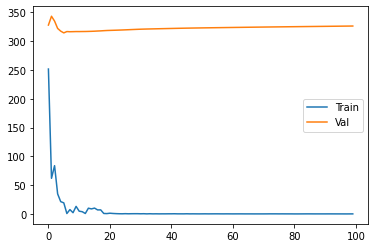

In [71]:
plt.plot(np.array(tloss), label = 'Train')
plt.plot(np.array(vloss), label = 'Val')
plt.legend()